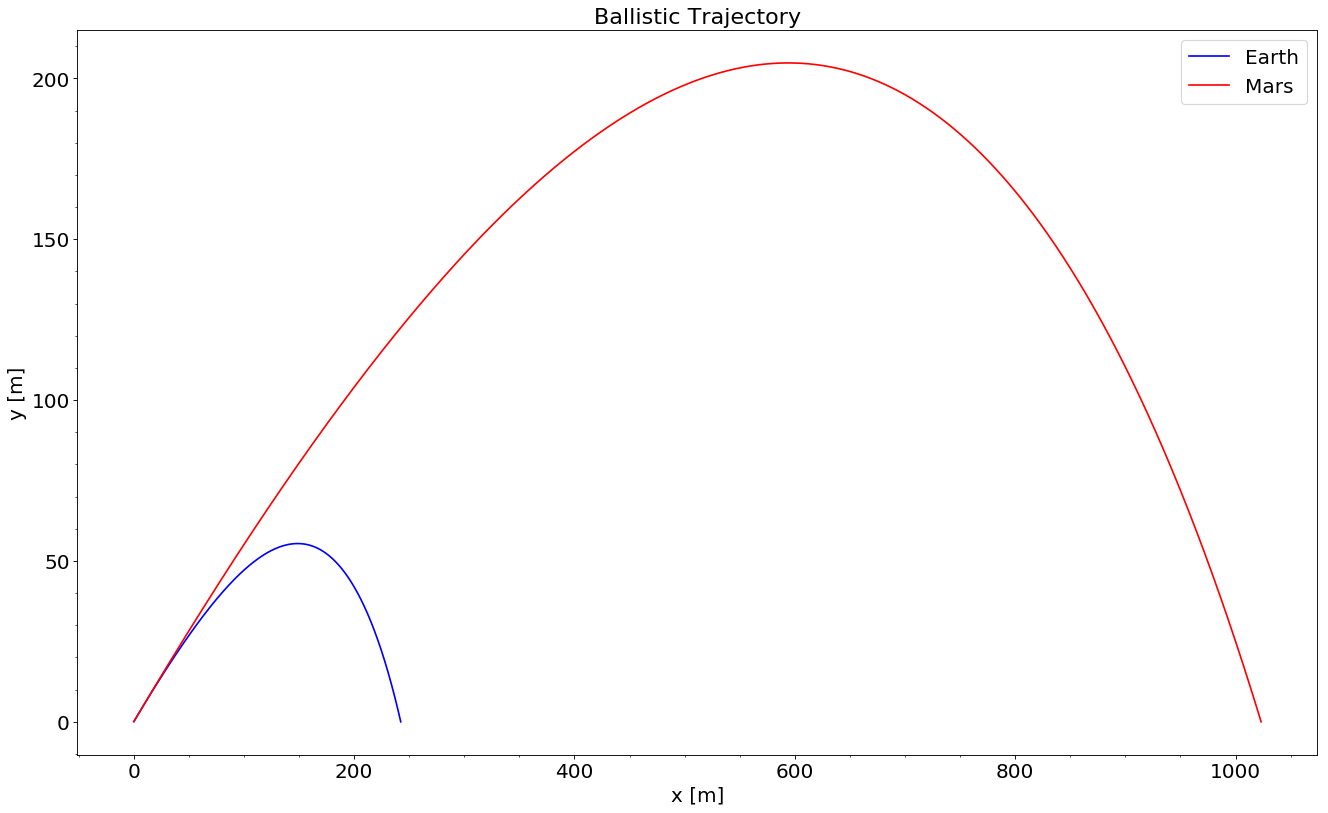

In [28]:
# %load prob_8_7.py
# start from Example 8.5 program odesim.py
#Universal Artillery Calculator

import numpy as np
import matplotlib.pyplot as plt

# constants
g     = 9.81	# m s^-2
g_m   = 3.71	# m s^-2
m     = 1.0	# kg
rho   = 1.22	# kg m^-3
rho_m = 0.20	# kg m^-3
C     = 0.47	# unitless
R     = 0.08    # m
h     = 0.001   # seconds
theta = 30.0*(np.pi/180) # radians
v0    = 100.0	# m s^-1
const = (rho*C*np.pi*R**2)/(2.0*m)
const_m = (rho_m*C*np.pi*R**2)/(2.0*m)

# define the equations of motion
def f(r,const,g):
    x   = r[0]
    y   = r[1]
    vx  = r[2]
    vy  = r[3]
    fx  = vx
    fy  = vy
    fvx = -const*vx*np.sqrt(vx**2+vy**2)
    fvy = -g-const*vy*np.sqrt(vx**2+vy**2)
    return np.array([fx,fy,fvx,fvy],float)

# containers for output
r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
r_m = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
xpoints = []
ypoints = []
xpoints_m = []
ypoints_m = []

# use fourth-order Runge-Kutta for Earth
while r[1]>=0:
    k1 = h*f(r,const,g)
    k2 = h*f(r+0.5*k1,const,g)
    k3 = h*f(r+0.5*k2,const,g)
    k4 = h*f(r+k3,const,g)
    r += (k1+2*k2+2*k3+k4)/6
    xpoints.append(r[0])
    ypoints.append(r[1])

# use fourth-order Runge-Kutta for Mars
while r_m[1]>=0:
    k1m = h*f(r_m,const_m,g_m)
    k2m = h*f(r_m+0.5*k1,const_m,g_m)
    k3m = h*f(r_m+0.5*k2,const_m,g_m)
    k4m = h*f(r_m+k3,const_m,g_m)
    r_m += (k1m+2*k2m+2*k3m+k4m)/6
    xpoints_m.append(r_m[0])
    ypoints_m.append(r_m[1])
    
    
# make plot for part (b)
plt.figure(figsize=(20, 12), dpi=80)
plt.title('Ballistic Trajectory',fontsize=20)
plt.plot(xpoints,ypoints,'b-',label = 'Earth')
plt.plot(xpoints_m,ypoints_m,'r-',label = 'Mars')
plt.xlabel("x [m]",fontsize=18)
plt.ylabel('y [m]',fontsize=18)
plt.minorticks_on()
plt.minorticks_on()
plt.tick_params(axis='both',labelsize=18)
plt.legend(fontsize=18)


plt.show()

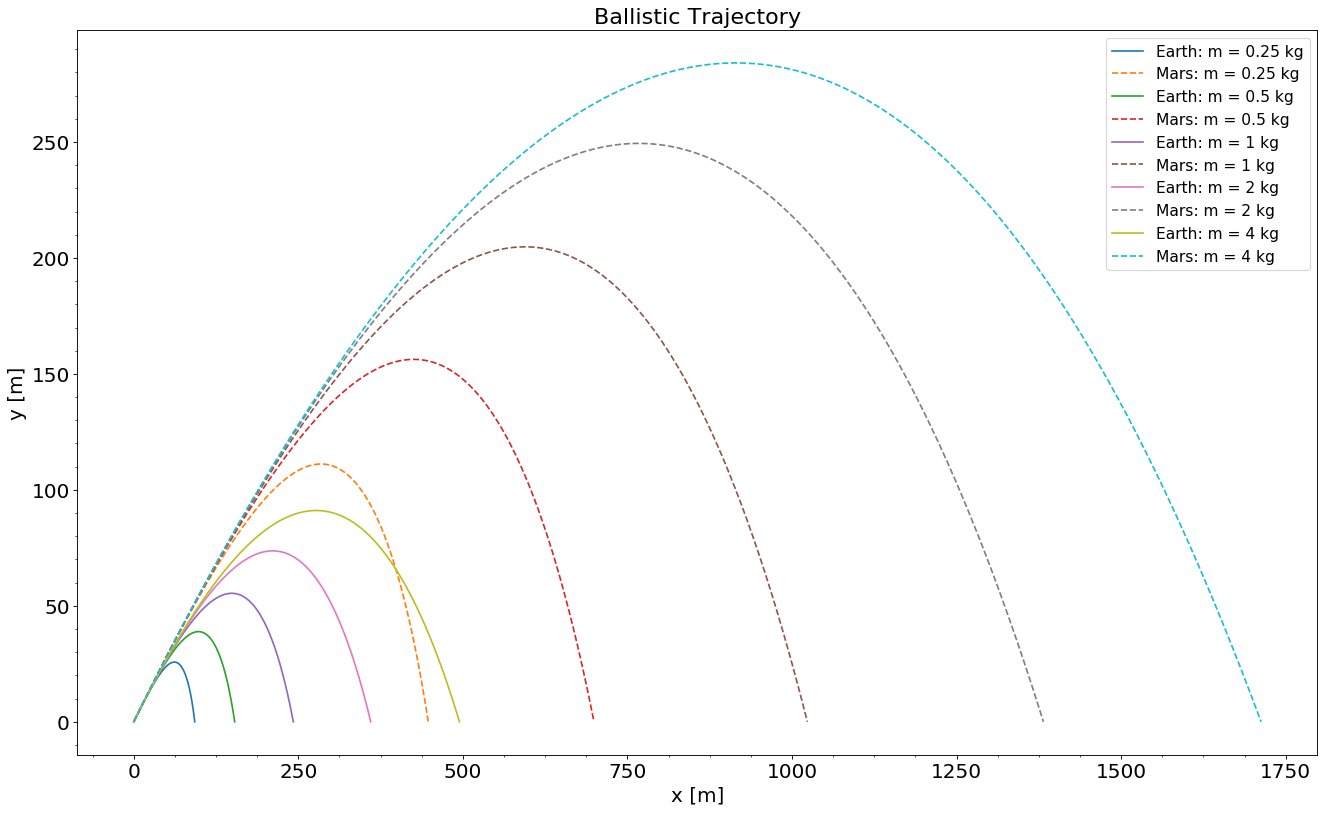

In [20]:
# try different values of m
plt.figure(figsize=(20, 12), dpi=80)
for m in [0.25,0.5,1,2,4]:
    const = (rho*C*np.pi*R**2)/(2.0*m)
    const_m = (rho_m*C*np.pi*R**2)/(2.0*m)
    r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
    r_m = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
    xpoints = []
    ypoints = []
    xpoints_m = []
    ypoints_m = []
          
        # use fourth-order Runge-Kutta for Earth
    while r[1]>=0:
        k1 = h*f(r,const,g)
        k2 = h*f(r+0.5*k1,const,g)
        k3 = h*f(r+0.5*k2,const,g)
        k4 = h*f(r+k3,const,g)
        r += (k1+2*k2+2*k3+k4)/6
        xpoints.append(r[0])
        ypoints.append(r[1])

        # use fourth-order Runge-Kutta for Mars
    while r_m[1]>=0:
        k1m = h*f(r_m,const_m,g_m)
        k2m = h*f(r_m+0.5*k1,const_m,g_m)
        k3m = h*f(r_m+0.5*k2,const_m,g_m)
        k4m = h*f(r_m+k3,const_m,g_m)
        r_m += (k1m+2*k2m+2*k3m+k4m)/6
        xpoints_m.append(r_m[0])
        ypoints_m.append(r_m[1])
        
    
    plt.plot(xpoints,ypoints,'-', label='Earth: m = '+str(m)+' kg')
    plt.plot(xpoints_m,ypoints_m,'--', label='Mars: m = '+str(m)+' kg')
        
        
plt.title('Ballistic Trajectory',fontsize=20)
plt.xlabel("x [m]",fontsize=18)
plt.ylabel('y [m]',fontsize=18)
plt.minorticks_on()
plt.tick_params(axis='both',labelsize=18)
plt.legend(fontsize=14)



plt.show()